In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
from keras.models import Model
import random

In [ ]:
np.random.seed(0)

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [ ]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels"
assert(X_train.shape[1:] == (28, 28)), "The dimensions of the image are not 28x28"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels"
assert(X_test.shape[1:] == (28, 28)), "The dimension of the image are not 28x28"

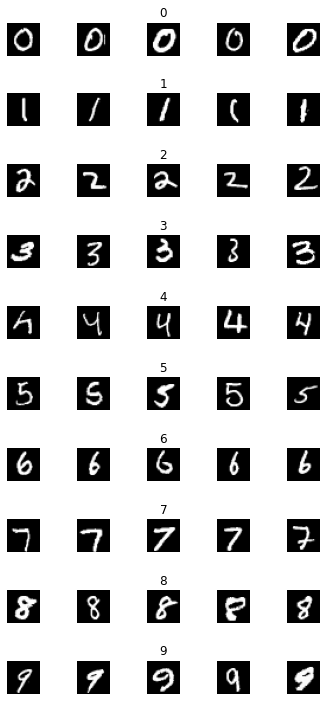

In [ ]:
num_of_samples = []

cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()

for i in range(cols):
  for j in range(num_classes):
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) -1)), :, :], cmap=plt.get_cmap('gray'))
    axs[j][i].axis("off")
    if i == 2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


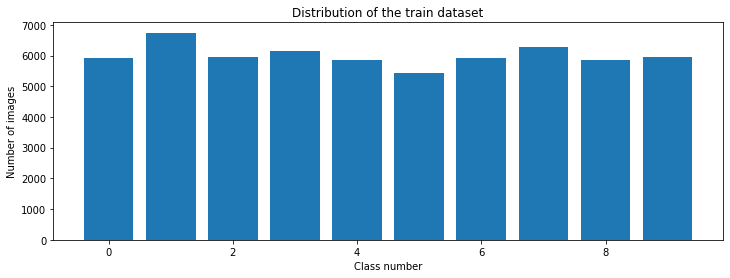

In [ ]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

X_train = X_train/255
X_test = X_test/255

In [ ]:
#define the leNet_model function
def leNet_model():
  model = Sequential()
  model.add(Conv2D(30, (5,5), input_shape=(28,28,1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(15, (3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model = leNet_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten (Flatten)            (None, 375)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               188000    
_________________________________________________________________
dropout (Dropout)            (None, 500)               0

In [ ]:
history = model.fit(x=X_train, y=y_train, epochs=10, verbose=1, validation_split=0.1, shuffle=1, batch_size=400)

Epoch 1/10
135/135 [==============================] - 29s 215ms/step - loss: 0.2444 - accuracy: 0.9204 - val_loss: 0.0530 - val_accuracy: 0.9842
Epoch 2/10
135/135 [==============================] - 29s 215ms/step - loss: 0.0713 - accuracy: 0.9786 - val_loss: 0.0396 - val_accuracy: 0.9877
Epoch 3/10
135/135 [==============================] - 29s 215ms/step - loss: 0.0560 - accuracy: 0.9823 - val_loss: 0.0396 - val_accuracy: 0.9888
Epoch 4/10
135/135 [==============================] - 29s 215ms/step - loss: 0.0509 - accuracy: 0.9845 - val_loss: 0.0480 - val_accuracy: 0.9873
Epoch 5/10
135/135 [==============================] - 29s 215ms/step - loss: 0.0495 - accuracy: 0.9846 - val_loss: 0.0380 - val_accuracy: 0.9897
Epoch 6/10
135/135 [==============================] - 29s 215ms/step - loss: 0.0432 - accuracy: 0.9869 - val_loss: 0.0452 - val_accuracy: 0.9890
Epoch 7/10
135/135 [==============================] - 29s 214ms/step - loss: 0.0413 - accuracy: 0.9877 - val_loss: 0.0366 - val_ac

Text(0.5, 0, 'epoch')

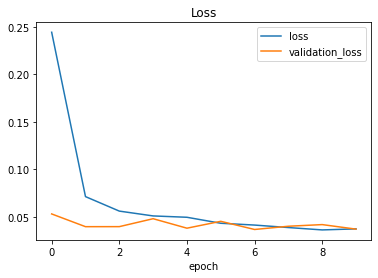

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'validation_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

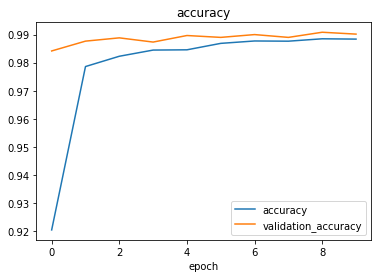

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'validation_accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')

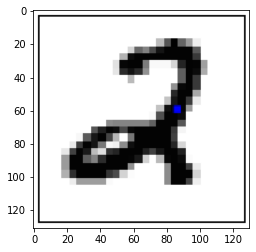

In [ ]:
import requests
from PIL import Image
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0 210]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0 210]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0 210]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  67 170
  254 155 100  17   0   0   0   0   0 210]
 [  0   0   0   0   0   0   0   0   0   0   0  18  89 176 155 198 239 252
  252 252 252 174   0   0   0   0   0 209]
 [  0   0   0   0   0   0   0   0   0   0  27 234 251 252 142  28  28  28
   62 222 252 246  87   0   0   0   0 210]
 [  0   0   0   0   0   0   0   0   0   0  28 228 243 229 119   2   2   2
   18 185 252 247  88   0   0   0   0 210]
 [  0   0   0   0   0   0   0   0   0   0   0   0  69   0   0   

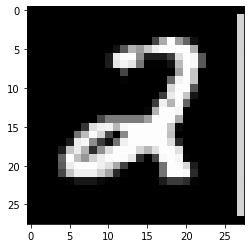

In [ ]:
import cv2
img_array = np.asarray(img)
resized = cv2.resize(img_array, (28, 28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap=plt.get_cmap("gray"))
print(image)

In [ ]:
image = image/255
image = image.reshape(1, 28,28,1)

In [ ]:
prediction = model.predict_classes(image)
print("Predicted image is", str(prediction))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Predicted image is [2]


In [ ]:
score = model.evaluate(x=X_test, y=y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.0371071882545948
Test accuracy: 0.9887999892234802


In [ ]:
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)
 
visual_layer1, visual_layer2 = layer1.predict(image), layer2.predict(image)
 
print(visual_layer1.shape)
print(visual_layer2.shape)

(1, 24, 24, 30)
(1, 10, 10, 15)


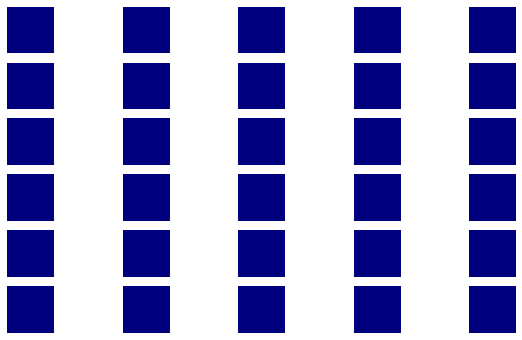

In [ ]:
plt.figure(figsize=(10,6))
for i in range(30):
  plt.subplot(6, 5, i+1)
  plt.imshow(visual_layer1[0, :, :, 1], cmap=plt.get_cmap('jet'))
  plt.axis('off')
  

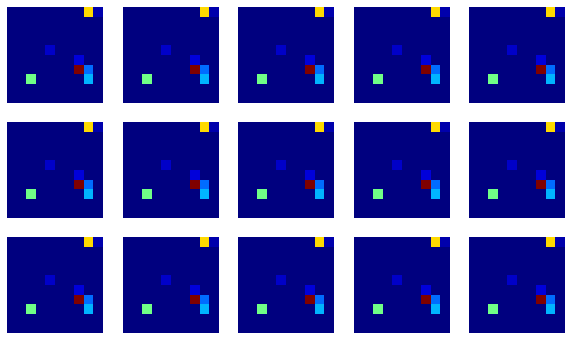

In [ ]:
plt.figure(figsize=(10,6))
for i in range(15):
  plt.subplot(3, 5, i+1)
  plt.imshow(visual_layer2[0, :, :, 1], cmap=plt.get_cmap('jet'))
  plt.axis('off')
  